In [56]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [57]:
def diag(S, l):
    delta = S[l-1] ** 2
    reval = []
    for index, v in enumerate(S):
        if index < l:
            reval.append(np.sqrt(v**2-delta))
        else:
            reval.append(0)
    reval = np.array(reval)
    return np.diag(reval)

In [58]:
def Error(A, B):
    return LA.norm(np.dot(A.transpose(), A)-np.dot(B.transpose(), B), 2)

In [59]:
def FD(A, l):
    n, d = A.shape
    B = np.zeros((2*l, d))

    for ai in A:
        for index in range(B.shape[0]):
            if sum(B[index]) == 0:
                break
        else:
            [U, S, V] = LA.svd(B, full_matrices=False)
            Sp = diag(S, l)
            B = np.dot(Sp, V)
        B[index] = ai
    return B

In [60]:
def test(A):
    [U, S, V] = LA.svd(A, full_matrices=False)
    S = np.diag(S)
    AA = np.dot(np.dot(U, S), V)
    print(A)
    print('-'*50)
    print(AA)

In [61]:
def read(path):
    reval = []
    with open(path, encoding='utf8') as f:
        for line in f:
            if len(line.strip()) == 0:
                continue
            s = line.strip().split()
            vector = [float(v) for v in s]
            reval.append(vector)
    return np.array(reval)

In [62]:
def topKSVD(A, k):
    U, S, V = np.linalg.svd(A, full_matrices=False)
    S = np.diag(S)
    Uk, Sk, Vk = U[:, :k], S[:k, :k], V[:k]
    Ak = np.dot(Uk, np.dot(Sk, Vk))
    return Ak

In [63]:
def probA(path):
    A = read(path)
    Af10 = (LA.norm(A, 'fro') ** 2) / 10
    print(Af10)
    A2 = topKSVD(A, 2)
    # limit = (LA.norm(A, 'fro') ** 2) / 3
    Af2_10 = (LA.norm(A-A2, 'fro')**2)/10
    print(Af2_10)
    # print('limit={a}'.format(a=str(limit)))
    for l in tqdm(range(1, 11)):
        limit = (LA.norm(A, 'fro') ** 2) / l
        print('theoretical bound={a}'.format(a=str(limit)))
        B = FD(A, l)
        error = Error(A, B)
        print('l={a}, error={b}'.format(a=str(l), b=str(error)))
        print('-'*10)

In [64]:
def RandomProjection(A, l):
    n, d = A.shape
    S = np.random.normal(size=(l, n))
    # S = []
    # for x in P:
    #     S.append(x/LA.norm(x, 2))
    # S = np.array(S)
    S = S * (np.sqrt(l)/np.sqrt(n))
    return np.dot(S, A)

In [77]:
def probB(path):
    A = read(path)
    lArr = []
    errorArr = []
    for l in tqdm(range(1, 300)):
        lArr.append(l)
        error = []
        for _ in range(50):
            B = RandomProjection(A, l)
            error.append(Error(A, B))
        error = np.array(error)
        e = sum(error) / len(error)
#         var = np.var(error)
        errorArr.append(e)
        if e <= 5091577.321786624:
            print("\n\n\n, l = {a}, error = {b} \n\n\n".format(a=str(l), b=str(e)))
        print('l={a}, average error={b}'.format(a=str(l), b=str(e)))
    return lArr, errorArr

In [71]:
path = "Data/A.dat"
# path = "2017/A.dat"
probA(path)

5091577.321786624
691449.069942987


theoretical bound=50915773.21786624
l=1, error=40504747.665230975
----------
theoretical bound=25457886.60893312
l=2, error=6499977.0603825785
----------
theoretical bound=16971924.405955415
l=3, error=3746744.911214615
----------
theoretical bound=12728943.30446656
l=4, error=2317369.665043749
----------
theoretical bound=10183154.643573249
l=5, error=1492120.3940118318
----------
theoretical bound=8485962.202977708
l=6, error=1049785.482583254
----------
theoretical bound=7273681.888266606
l=7, error=797950.7974367802
----------
theoretical bound=6364471.65223328
l=8, error=517808.7326678679
----------
theoretical bound=5657308.135318471
l=9, error=316702.65557506453
----------
theoretical bound=5091577.321786624
l=10, error=133994.12445462553
----------


In [74]:
lArr, eArr = probB(path)

l=1, average error=40524671.63648826
l=2, average error=40506322.99385008
l=3, average error=40457902.34597046
l=4, average error=40395896.77675524
l=5, average error=40320840.82050356
l=6, average error=40217568.45095112
l=7, average error=40120674.2866704
l=8, average error=40013405.32569913
l=9, average error=39866810.50893939
l=10, average error=39670505.93120328
l=11, average error=39552476.336701564
l=12, average error=39394147.93678784
l=13, average error=39166315.42400913
l=14, average error=38931562.75836673
l=15, average error=38522271.81772988
l=16, average error=38442979.03750121
l=17, average error=38192356.508014224
l=18, average error=37890593.248558275
l=19, average error=37659611.37417836
l=20, average error=37242898.0868501
l=21, average error=37040737.934341416
l=22, average error=36736793.91995437
l=23, average error=36147491.71770683
l=24, average error=35702690.7445338
l=25, average error=35102852.59231318
l=26, average error=35182950.48182516
l=27, average error=

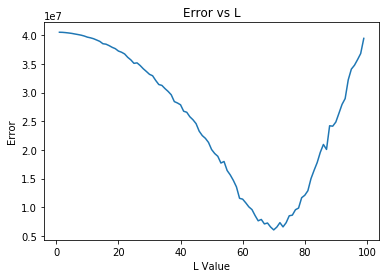

In [80]:
plt.plot(lArr, eArr)
plt.xlabel("L Value")
plt.ylabel("Error")
plt.title("Error vs L")
plt.show()

In [78]:
lArr1, eArr1 = probB(path)

l=1, average error=40523030.69020191
l=2, average error=40486996.43675235
l=3, average error=40443580.18738563
l=4, average error=40409276.699108586
l=5, average error=40304025.23981717
l=6, average error=40246816.55781874
l=7, average error=40132728.57402884
l=8, average error=39992350.81589484
l=9, average error=39847640.55809339
l=10, average error=39642247.86230357
l=11, average error=39560008.53371322
l=12, average error=39390669.63147982
l=13, average error=39194518.17151752
l=14, average error=39050763.64092463
l=15, average error=38840842.10793305
l=16, average error=38301786.31912288
l=17, average error=38214514.13882416
l=18, average error=37913061.251150884
l=19, average error=37559651.88613242
l=20, average error=37080317.645367585
l=21, average error=37066301.06057035
l=22, average error=36589747.51507032
l=23, average error=36148946.50956746
l=24, average error=36064487.55261076
l=25, average error=35341464.79108248
l=26, average error=34618784.2740335
l=27, average error

l=212, average error=325600888.99712294
l=213, average error=329974362.11655843
l=214, average error=335673689.27599734
l=215, average error=328207286.42547816
l=216, average error=329451184.1571138
l=217, average error=343067525.34759855
l=218, average error=341332744.990513
l=219, average error=342654230.47670877
l=220, average error=352041685.10284483
l=221, average error=364645388.07149047
l=222, average error=364048326.50651956
l=223, average error=350349707.48981684
l=224, average error=365478022.0028769
l=225, average error=371445149.7285475
l=226, average error=368552792.4664949
l=227, average error=380480574.9448153
l=228, average error=382806668.70181364
l=229, average error=384921742.95636284
l=230, average error=384790356.25921994
l=231, average error=396014617.549097
l=232, average error=396474289.68244356
l=233, average error=401476032.38435435
l=234, average error=399577227.508101
l=235, average error=410836296.7714629
l=236, average error=404396556.2442779
l=237, averag

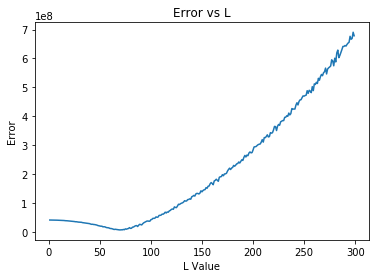

In [81]:
plt.plot(lArr1, eArr1)
plt.xlabel("L Value")
plt.ylabel("Error")
plt.title("Error vs L")
plt.show()